In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv")

# Quick look
print(df.shape)
print(df.columns)
df.head()


(4009, 12)
Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


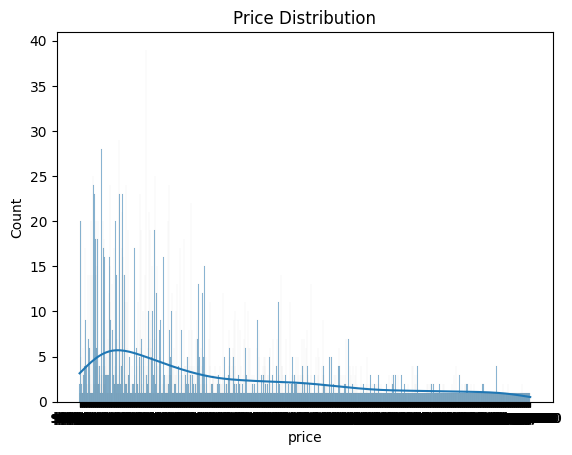

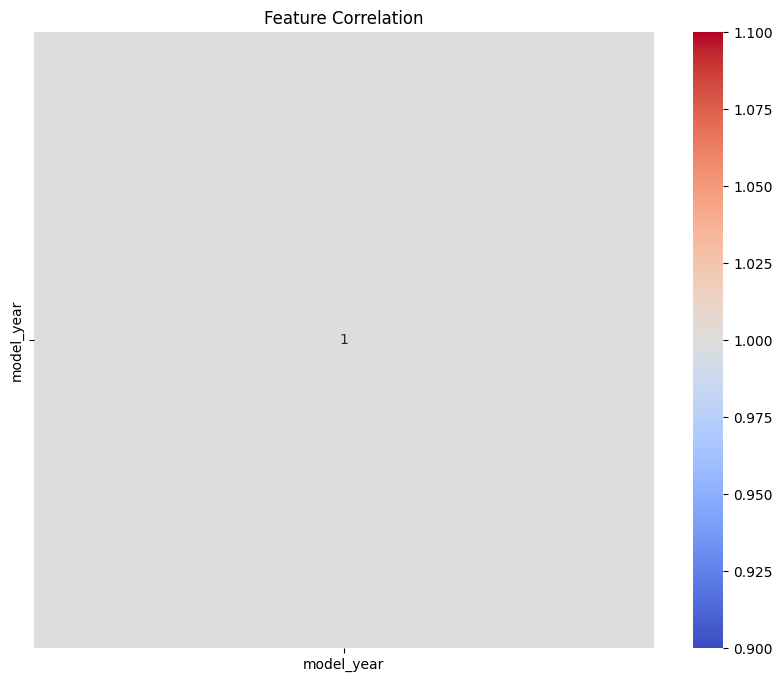

In [4]:
# Basic Info
df.info()
df.describe()
df.isnull().sum()

# Visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Price distribution
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog, messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data(filepath):
    df = pd.read_csv("C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv")
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.dropna(inplace=True)
    return df

def train_model(df):
    X = df.drop('price', axis=1)
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist()

# GUI setup
def open_file():
    file_path = filedialog.askopenfilename()
    if not file_path:
        return
    try:
        df = load_data(file_path)
        global model, scaler, columns
        model, scaler, score, columns = train_model(df)
        messagebox.showinfo("Training Complete", f"Model R² Score: {score:.2f}")
        for col in columns:
            entry_widgets[col] = tk.Entry(root)
            entry_widgets[col].pack()
            entry_widgets[col].insert(0, f"{col}")
        predict_button.pack()
    except Exception as e:
        messagebox.showerror("Error", str(e))

def predict_price():
    try:
        values = [float(entry_widgets[col].get()) for col in columns]
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"Predicted Price: ₹{pred[0]:,.2f}")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Main GUI window
root = tk.Tk()
root.title("Used Car Price Prediction")
root.geometry("400x600")

load_button = tk.Button(root, text="Load CSV", command=open_file)
load_button.pack(pady=10)

entry_widgets = {}
predict_button = tk.Button(root, text="Predict Price", command=predict_price)
result_label = tk.Label(root, text="")
result_label.pack(pady=10)

root.mainloop()

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Updated file path
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    df.dropna(inplace=True)
    return df

def train_model(df):
    X = df.drop('price', axis=1)
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist()

# Predict price
def predict_price():
    try:
        values = [float(entry_widgets[col].get()) for col in columns]
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load model and scaler at start
df = load_data()
model, scaler, score, columns = train_model(df)

entry_widgets = {}
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)
    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)
    entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
    entry.pack(side=tk.RIGHT, padx=10)
    entry_widgets[col] = entry

predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

root.mainloop()

In [11]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist()

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col in encoders:
        # Dropdown for categorical columns
        options = encoders[col].classes_.tolist()
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=options, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])  # Store both dropdown and encoder
    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get()
    # Find the relevant models for the selected brand
    filtered_data = df[df['brand'] == brand]
    models = filtered_data['model'].unique().tolist()

    # Update the models dropdown with filtered models
    model_dropdown['values'] = models
    model_dropdown.set(models[0])  # Set default to the first model

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        brands = df_raw['brand'].unique().tolist()
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\thora\AppData\Local\Temp\ipykernel_19084\744936030.py", line 75, in update_models
    model_dropdown.set(models[0])  # Set default to the first model
                       ~~~~~~^^^
IndexError: list index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\thora\AppData\Local\Temp\ipykernel_19084\744936030.py", line 75, in update_models
    model_dropdown.set(models[0])  # Set default to the first model
                       ~~~~~~^^^
IndexError: list index out of range
Exception in Tkinter callback
Traceback (most recent call last

In [13]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get()
    # Find the relevant models for the selected brand
    filtered_data = df[df['brand'] == brand]
    models = filtered_data['model'].unique().tolist()

    if models:
        # Update the models dropdown with filtered models
        model_dropdown['values'] = models
        model_dropdown.set(models[0])  # Set default to the first model
        model_dropdown.config(state='normal')  # Enable the model dropdown
    else:
        # If no models are available for the selected brand, clear and disable model dropdown
        model_dropdown['values'] = []
        model_dropdown.set('No models available')
        model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        brands = df_raw['brand'].unique().tolist()
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [14]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get()
    # Find the relevant models for the selected brand
    filtered_data = df[df['brand'] == encoders['brand'].transform([brand])[0]]
    models = filtered_data['model'].unique().tolist()

    if models:
        # Update the models dropdown with filtered models
        model_dropdown['values'] = models
        model_dropdown.set(models[0])  # Set default to the first model
        model_dropdown.config(state='normal')  # Enable the model dropdown
    else:
        # If no models are available for the selected brand, clear and disable model dropdown
        model_dropdown['values'] = []
        model_dropdown.set('No models available')
        model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_encode.py", line 235, in _encode
    return _map_to_integer(values, uniques)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_encode.py", line 174, in _map_to_integer
    return xp.asarray([table[v] for v in values], device=device(values))
                       ~~~~~^^^
  File "C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_encode.py", line 167, in __missing__
    raise KeyError(key)
KeyError: "'Acura'"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\thora\App

In [15]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get()
    try:
        # Transform the selected brand back to its encoded value using the encoder
        brand_encoded = encoders['brand'].transform([brand])[0]
        
        # Filter the dataframe to show only models from the selected brand
        filtered_data = df[df['brand'] == brand_encoded]
        
        # Get the unique models for that brand
        models = filtered_data['model'].unique().tolist()

        if models:
            # Update the models dropdown with filtered models
            model_dropdown['values'] = models
            model_dropdown.set(models[0])  # Set default to the first model
            model_dropdown.config(state='normal')  # Enable the model dropdown
        else:
            # If no models are available for the selected brand, clear and disable model dropdown
            model_dropdown['values'] = []
            model_dropdown.set('No models available')
            model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [16]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get()
    try:
        # Transform the selected brand to its encoded value, handle unseen labels
        if brand in encoders['brand'].classes_:
            brand_encoded = encoders['brand'].transform([brand])[0]
        else:
            # Fallback: use the first brand if the selected brand is unseen
            brand_encoded = encoders['brand'].transform([encoders['brand'].classes_[0]])[0]
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized. Defaulting to '{encoders['brand'].classes_[0]}'.")
        
        # Filter the dataframe to show only models from the selected brand
        filtered_data = df[df['brand'] == brand_encoded]
        
        # Get the unique models for that brand
        models = filtered_data['model'].unique().tolist()

        if models:
            # Update the models dropdown with filtered models
            model_dropdown['values'] = models
            model_dropdown.set(models[0])  # Set default to the first model
            model_dropdown.config(state='normal')  # Enable the model dropdown
        else:
            # If no models are available for the selected brand, clear and disable model dropdown
            model_dropdown['values'] = []
            model_dropdown.set('No models available')
            model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [17]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get()
    try:
        # Check if the brand exists in the encoder classes
        if brand in encoders['brand'].classes_:
            brand_encoded = encoders['brand'].transform([brand])[0]
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            # Fallback if the brand is not recognized
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [18]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get()])[0]  # Use the encoder to transform the selected brand/model
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get()
    try:
        # Get the encoded value for the selected brand
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [19]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Get the encoded value for the selected brand
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [20]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Get the encoded value for the selected brand
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        original_brands = [brand.strip("'") for brand in original_brands]  # Remove single quotes from brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # Text entry for numerical columns
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [21]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Get the encoded value for the selected brand
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        original_brands = [brand.strip("'") for brand in original_brands]  # Remove single quotes from brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # For other categorical columns, create dropdowns
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = dropdown

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Get the encoded value for the selected brand
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Check if the column is categorical
    if col == "brand":
        # Dropdown for brand selection
        original_brands = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original brand names
        original_brands = [brand.strip("'") for brand in original_brands]  # Remove single quotes from brand names
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=original_brands, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = brand_dropdown

        # Bind the update_models function to the brand dropdown selection
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)

    elif col == "model":
        # Dropdown for model selection (will be populated dynamically)
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    else:
        # For other categorical columns, create dropdowns
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = dropdown

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


KeyError: 'model_year'

In [22]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Get the encoded value for the selected brand
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Handle categorical columns with dropdowns
    if col in encoders:
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])

    else:
        # For numeric columns, use an entry widget
        entry = tk.Entry(frame, font=("Helvetica", 10), width=18)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Get the encoded value for the selected brand
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Handle categorical columns with dropdowns
    if col == 'brand':
        # Create the dropdown for the brand column
        unique_values = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=unique_values, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)  # Trigger update_models when a brand is selected
        entry_widgets['brand'] = brand_dropdown

    elif col in encoders:
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])

    else:
        # For numeric columns, use an entry widget
        entry = tk.Entry(frame, font=("Helvetica", 10), width=18)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [24]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]
            
            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Handle categorical columns with dropdowns
    if col == 'brand':
        # Create the dropdown for the brand column
        unique_values = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=unique_values, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)  # Trigger update_models when a brand is selected
        entry_widgets['brand'] = brand_dropdown

    elif col in encoders:
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])

    else:
        # For numeric columns, use an entry widget
        entry = tk.Entry(frame, font=("Helvetica", 10), width=18)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [25]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Check if the brand is valid and exists in the encoder's classes
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]

            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                # No models found, disable dropdown
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Handle categorical columns with dropdowns
    if col == 'brand':
        # Create the dropdown for the brand column
        unique_values = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=unique_values, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)  # Trigger update_models when a brand is selected
        entry_widgets['brand'] = brand_dropdown

    elif col in encoders:
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])

    else:
        # For numeric columns, use an entry widget
        entry = tk.Entry(frame, font=("Helvetica", 10), width=18)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [26]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Check if the brand is valid and exists in the encoder's classes
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]

            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                # No models found, disable dropdown
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Handle categorical columns with dropdowns
    if col == 'brand':
        # Create the dropdown for the brand column
        unique_values = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=unique_values, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)  # Trigger update_models when a brand is selected
        entry_widgets['brand'] = brand_dropdown

    elif col in encoders:
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])

    else:
        # For numeric columns, use an entry widget
        entry = tk.Entry(frame, font=("Helvetica", 10), width=18)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [27]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess the data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')  # Update file path if necessary
    # Handle categorical columns with LabelEncoder
    categorical_cols = df.select_dtypes(include='object').columns
    encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Store encoders for future use
    df.dropna(inplace=True)  # Drop rows with missing values
    return df, encoders

# Train the model
def train_model(df):
    X = df.drop('price', axis=1)  # Features
    y = df['price']  # Target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict and calculate R² score
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)

    return model, scaler, score, X.columns.tolist(), df

# Predict the price
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):  # For dropdowns with encoders
                val = widget[1].transform([widget[0].get().strip()])[0]  # Ensure no extra spaces or quotes
            else:
                val = float(widget.get())
            values.append(val)

        # Scale the input values before predicting
        values_scaled = scaler.transform([values])
        pred = model.predict(values_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Update models dropdown based on selected brand
def update_models(event):
    brand = brand_dropdown.get().strip()  # Ensure no extra spaces or quotes
    try:
        # Check if the brand is valid and exists in the encoder's classes
        if brand in encoders['brand'].classes_:  # Check if the selected brand exists in the encoder classes
            brand_encoded = encoders['brand'].transform([brand])[0]  # Transform the brand to encoded value
            # Filter the dataframe to show only models from the selected brand
            filtered_data = df[df['brand'] == brand_encoded]

            # Get the unique models for that brand
            models = filtered_data['model'].unique().tolist()

            if models:
                # Update the models dropdown with filtered models
                model_dropdown['values'] = models
                model_dropdown.set(models[0])  # Set default to the first model
                model_dropdown.config(state='normal')  # Enable the model dropdown
            else:
                # No models found, disable dropdown
                model_dropdown['values'] = []
                model_dropdown.set('No models available')
                model_dropdown.config(state='disabled')  # Disable the dropdown if no models are available
        else:
            messagebox.showwarning("Warning", f"Brand '{brand}' is not recognized.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Enter car details to estimate its market price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

# Load the model and scaler at start
df, encoders = load_data()
model, scaler, score, columns, df_raw = train_model(df)

entry_widgets = {}

# Create input fields for each feature (dropdown for all categorical features)
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    # Handle categorical columns with dropdowns
    if col == 'brand':
        # Create the dropdown for the brand column
        unique_values = encoders['brand'].inverse_transform(df_raw['brand'].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=unique_values, state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)  # Trigger update_models when a brand is selected
        entry_widgets['brand'] = brand_dropdown

    elif col in encoders:
        unique_values = encoders[col].inverse_transform(df_raw[col].unique())  # Get original values
        unique_values = [value.strip("'") for value in unique_values]  # Remove quotes if any
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])

    else:
        # For numeric columns, use an entry widget
        entry = tk.Entry(frame, font=("Helvetica", 10), width=18)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Button to trigger the price prediction
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Label to display the result
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer to display model accuracy (R² score)
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

# Run the GUI
root.mainloop()


In [29]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load and preprocess data
df_raw = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')
df = df_raw.copy()

categorical_cols = df.select_dtypes(include='object').columns.tolist()
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

df.dropna(inplace=True)

# Train model
def train_model(df):
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    score = r2_score(y_test, model.predict(X_test_scaled))
    return model, scaler, score, X.columns.tolist()

model, scaler, score, columns = train_model(df)

# GUI setup
root = tk.Tk()
root.title("Used Car Price Predictor")
root.geometry("500x700")
root.configure(bg="#f0f5f5")

tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5").pack(pady=20)
tk.Label(root, text="Enter car details to estimate price", font=("Helvetica", 12), bg="#f0f5f5").pack(pady=5)

entry_widgets = {}
brand_var = tk.StringVar()
model_var = tk.StringVar()

# Model dropdown will be updated dynamically
model_dropdown = None

# Function to update model dropdown based on selected brand
def update_models(*args):
    brand = brand_var.get()
    if brand not in encoders['brand'].classes_:
        messagebox.showwarning("Warning", f'Brand "{brand}" is not recognized.')
        return
    brand_encoded = encoders['brand'].transform([brand])[0]
    filtered_models = df_raw[df_raw['brand'] == brand]['model'].unique().tolist()

    model_dropdown['values'] = filtered_models
    if filtered_models:
        model_dropdown.set(filtered_models[0])

# Add input widgets
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)
    tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5").pack(side=tk.LEFT, padx=10)

    if col == 'brand':
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=encoders['brand'].classes_.tolist(), state='readonly', width=18)
        brand_dropdown.pack(side=tk.RIGHT, padx=10)
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)
        entry_widgets[col] = brand_dropdown

    elif col == 'model':
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, values=[], state='readonly', width=18)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown

    elif col in encoders:
        options = encoders[col].classes_.tolist()
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=options, state='readonly', width=18)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = dropdown
    else:
        entry = tk.Entry(frame, font=("Helvetica", 10), width=20)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Prediction function
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, ttk.Combobox):
                val = widget.get()
                if col in encoders:
                    val = encoders[col].transform([val])[0]
            else:
                val = float(widget.get())
            values.append(val)

        scaled = scaler.transform([values])
        prediction = model.predict(scaled)
        result_label.config(text=f"\nPredicted Price: ₹{prediction[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Predict button
tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"), bg="#4CAF50", fg="white", command=predict_price).pack(pady=20)

result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray").pack(side="bottom", pady=10)

root.mainloop()


C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load raw data and preprocess
df_raw = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')
df_raw.dropna(inplace=True)

# Store encoders and original values
encoders = {}
categorical_cols = df_raw.select_dtypes(include='object').columns.tolist()

# Fit LabelEncoders
df = df_raw.copy()
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Train model
def train_model(data):
    X = data.drop('price', axis=1)
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = r2_score(y_test, y_pred)
    return model, scaler, score, X.columns.tolist()

model, scaler, score, columns = train_model(df)

# GUI Setup
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("600x750")
root.configure(bg="#f0f5f5")

title_label = tk.Label(root, text="Used Car Price Predictor", font=("Helvetica", 20, "bold"), bg="#f0f5f5", fg="#333")
title_label.pack(pady=20)

subtitle = tk.Label(root, text="Select car features to estimate its price", font=("Helvetica", 12), bg="#f0f5f5")
subtitle.pack(pady=5)

entry_widgets = {}

# Dynamic update for model based on brand
def update_models(event=None):
    selected_brand = brand_var.get()
    try:
        brand_encoded = encoders['brand'].transform([selected_brand])[0]
        filtered_df = df[df['brand'] == brand_encoded]
        model_codes = filtered_df['model'].unique()
        model_names = encoders['model'].inverse_transform(model_codes)

        model_dropdown['values'] = sorted(model_names)
        if model_names.any():
            model_var.set(model_names[0])
    except Exception as e:
        messagebox.showwarning("Warning", f"Brand \"{selected_brand}\" is not recognized.\n{e}")

# Generate input widgets
for col in columns:
    frame = tk.Frame(root, bg="#f0f5f5")
    frame.pack(pady=5)
    label = tk.Label(frame, text=col, font=("Helvetica", 10), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    if col in encoders:
        unique_values = sorted(encoders[col].classes_.tolist())
        var = tk.StringVar()
        dropdown = ttk.Combobox(frame, textvariable=var, values=unique_values, state='readonly', width=20)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = (dropdown, encoders[col])

        if col == 'brand':
            brand_var = var
            dropdown.bind("<<ComboboxSelected>>", update_models)

        if col == 'model':
            model_var = var
            model_dropdown = dropdown
    else:
        entry = tk.Entry(frame, font=("Helvetica", 10), width=22)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Predict function
def predict_price():
    try:
        input_values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, tuple):
                dropdown, encoder = widget
                val = encoder.transform([dropdown.get()])[0]
            else:
                val = float(widget.get())
            input_values.append(val)

        input_scaled = scaler.transform([input_values])
        pred = model.predict(input_scaled)
        result_label.config(text=f"\nPredicted Price: ₹{pred[0]:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Predict button
predict_button = tk.Button(root, text="Predict Price", font=("Helvetica", 12, "bold"),
                           bg="#4CAF50", fg="white", command=predict_price)
predict_button.pack(pady=20)

# Result label
result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f0f5f5")
result_label.pack(pady=10)

# Footer
footer = tk.Label(root, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10),
                  bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

root.mainloop()


C:\Users\thora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import messagebox, ttk
from PIL import Image, ImageTk
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')
    df.dropna(inplace=True)
    return df

df_raw = load_data()

# Encode categorical variables and store encoders
df = df_raw.copy()
encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Train model
def train_model(df):
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    score = r2_score(y_test, model.predict(X_test_scaled))
    return model, scaler, score, X.columns.tolist()

model, scaler, score, columns = train_model(df)

# Tkinter GUI
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.geometry("700x750")

# Set background image
try:
    bg_img = Image.open("background.jpg").resize((700, 750))
    bg_photo = ImageTk.PhotoImage(bg_img)
    background_label = tk.Label(root, image=bg_photo)
    background_label.place(relwidth=1, relheight=1)
except:
    root.configure(bg="#f2f2f2")

# Frame for widgets
main_frame = tk.Frame(root, bg="#ffffff", bd=2, relief=tk.RIDGE)
main_frame.place(relx=0.5, rely=0.5, anchor=tk.CENTER)

title = tk.Label(main_frame, text="Used Car Price Predictor", font=("Arial", 20, "bold"), bg="white", fg="#333")
title.pack(pady=10)

subtitle = tk.Label(main_frame, text="Select car details below", font=("Arial", 12), bg="white")
subtitle.pack(pady=5)

entry_widgets = {}

# Function to update models based on selected brand
def update_models(event):
    brand = brand_var.get()
    try:
        brand_code = encoders['brand'].transform([brand])[0]
        filtered = df_raw[df_raw['brand'] == brand]
        model_values = sorted(filtered['model'].unique().tolist())
        model_dropdown['values'] = model_values
        if model_values:
            model_var.set(model_values[0])
    except Exception as e:
        messagebox.showwarning("Brand Error", f"Brand '{brand}' not recognized.")

# Dynamic form creation
dropdown_vars = {}
for col in columns:
    frame = tk.Frame(main_frame, bg="white")
    frame.pack(pady=5)

    label = tk.Label(frame, text=col, font=("Arial", 10), bg="white")
    label.pack(side=tk.LEFT, padx=10)

    if col == 'brand':
        brand_var = tk.StringVar()
        brands = sorted(df_raw['brand'].unique())
        dropdown = ttk.Combobox(frame, textvariable=brand_var, values=brands, state='readonly', width=30)
        dropdown.pack(side=tk.RIGHT, padx=10)
        dropdown.bind("<<ComboboxSelected>>", update_models)
        entry_widgets[col] = dropdown
        dropdown_vars[col] = brand_var

    elif col == 'model':
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, values=[], state='readonly', width=30)
        model_dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = model_dropdown
        dropdown_vars[col] = model_var

    elif col in encoders:
        var = tk.StringVar()
        values = sorted(encoders[col].classes_.tolist())
        dropdown = ttk.Combobox(frame, textvariable=var, values=values, state='readonly', width=30)
        dropdown.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = dropdown
        dropdown_vars[col] = var

    else:
        entry = tk.Entry(frame, font=("Arial", 10), width=30)
        entry.pack(side=tk.RIGHT, padx=10)
        entry_widgets[col] = entry

# Prediction function
def predict_price():
    try:
        inputs = []
        for col in columns:
            widget = entry_widgets[col]
            if col in encoders:
                val = dropdown_vars[col].get()
                val_encoded = encoders[col].transform([val])[0]
                inputs.append(val_encoded)
            else:
                val = float(widget.get())
                inputs.append(val)

        inputs_scaled = scaler.transform([inputs])
        predicted = model.predict(inputs_scaled)[0]
        result_label.config(text=f"\nPredicted Price: ₹{predicted:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Error", f"Prediction Failed:\n{str(e)}")

# Predict button
predict_btn = tk.Button(main_frame, text="Predict Price", font=("Arial", 12, "bold"), bg="#007acc", fg="white", command=predict_price)
predict_btn.pack(pady=15)

# Result label
result_label = tk.Label(main_frame, text="", font=("Arial", 14), bg="white")
result_label.pack(pady=5)

# Footer
footer = tk.Label(main_frame, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Arial", 10), bg="white", fg="gray")
footer.pack(pady=10)

root.mainloop()


In [32]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from PIL import Image, ImageTk

# Load raw data for display values
df_raw = pd.read_csv("C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv")
df = df_raw.copy()

# Encode categoricals
categorical_cols = df.select_dtypes(include='object').columns.tolist()
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

# Train model
def train_model(df):
    X = df.drop("price", axis=1)
    y = df["price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    score = r2_score(y_test, model.predict(X_test_scaled))
    return model, scaler, score, X.columns.tolist()

model, scaler, score, columns = train_model(df)

# GUI
root = tk.Tk()
root.title("Used Car Price Predictor")
root.state("zoomed")  # Fullscreen

# Set background image
bg_img = Image.open("C:/Users/thora/Downloads/Sawarj car predition/car_bg.jpg")
bg_img = bg_img.resize((1920, 1080), Image.LANCZOS)
bg_photo = ImageTk.PhotoImage(bg_img)

canvas = tk.Canvas(root)
canvas.pack(fill="both", expand=True)
canvas.create_image(0, 0, image=bg_photo, anchor="nw")

main_frame = tk.Frame(canvas, bg="#ffffff", bd=2, relief=tk.RIDGE)
main_frame.place(relx=0.5, rely=0.5, anchor="center")

title = tk.Label(main_frame, text="🚗 Used Car Price Predictor", font=("Helvetica", 24, "bold"), bg="#ffffff", fg="#333")
title.grid(row=0, column=0, columnspan=2, pady=20)

entry_widgets = {}

def update_model_dropdown(*args):
    brand = brand_var.get()
    if not brand:
        return
    if brand not in encoders['brand'].classes_:
        return

    filtered_df = df_raw[df_raw['brand'] == brand]
    models = sorted(filtered_df['model'].unique().tolist())
    model_dropdown['values'] = models
    if models:
        model_var.set(models[0])
    else:
        model_var.set("")

row_index = 1
for col in columns:
    label = tk.Label(main_frame, text=col.replace("_", " ").capitalize(), font=("Helvetica", 12), bg="#ffffff", anchor="w")
    label.grid(row=row_index, column=0, padx=10, pady=5, sticky="w")

    if col == "brand":
        brand_var = tk.StringVar()
        brand_dropdown = ttk.Combobox(main_frame, textvariable=brand_var, state="readonly", width=30)
        brand_dropdown['values'] = sorted(df_raw['brand'].unique())
        brand_dropdown.grid(row=row_index, column=1, padx=10, pady=5, sticky="ew")
        brand_dropdown.bind("<<ComboboxSelected>>", update_model_dropdown)
        entry_widgets[col] = brand_dropdown

    elif col == "model":
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(main_frame, textvariable=model_var, state="readonly", width=30)
        model_dropdown.grid(row=row_index, column=1, padx=10, pady=5, sticky="ew")
        entry_widgets[col] = model_dropdown

    elif col in encoders:
        var = tk.StringVar()
        values = sorted(df_raw[col].dropna().unique().tolist())
        dropdown = ttk.Combobox(main_frame, textvariable=var, values=values, state="readonly", width=30)
        dropdown.grid(row=row_index, column=1, padx=10, pady=5, sticky="ew")
        entry_widgets[col] = dropdown
    else:
        entry = tk.Entry(main_frame, font=("Helvetica", 11), width=33)
        entry.grid(row=row_index, column=1, padx=10, pady=5, sticky="ew")
        entry_widgets[col] = entry

    row_index += 1

def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, ttk.Combobox):
                val = widget.get()
                if col in encoders:
                    val = encoders[col].transform([val])[0]
            else:
                val = float(widget.get())
            values.append(val)
        values_scaled = scaler.transform([values])
        prediction = model.predict(values_scaled)[0]
        result_label.config(text=f"Predicted Price: ₹{prediction:,.2f}", fg="green")
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

predict_btn = tk.Button(main_frame, text="Predict Price", font=("Helvetica", 14), bg="#4CAF50", fg="white", command=predict_price)
predict_btn.grid(row=row_index, column=0, columnspan=2, pady=20)

result_label = tk.Label(main_frame, text="", font=("Helvetica", 16, "bold"), bg="#ffffff")
result_label.grid(row=row_index + 1, column=0, columnspan=2)

footer = tk.Label(canvas, text=f"Model Accuracy (R²): {score:.2f}", font=("Helvetica", 10), bg="#f0f0f0", fg="gray")
footer.pack(side="bottom", pady=10)

root.mainloop()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\thora\\Downloads\\Sawarj car predition\\car_bg.jpg'

In [33]:
pip install reportlab


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from reportlab.pdfgen import canvas
from tkinter import filedialog
from PIL import Image, ImageTk

# Load and preprocess data
def load_data():
    df = pd.read_csv('C:/Users/thora/Downloads/Sawarj car predition/used_cars.csv')
    df.dropna(inplace=True)
    return df

df_raw = load_data()
df = df_raw.copy()
encoders = {}

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le

def train_model(df):
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    score = r2_score(y_test, model.predict(X_test_scaled))
    return model, scaler, score, X.columns.tolist()

model, scaler, score, columns = train_model(df)

# --- GUI ---
root = tk.Tk()
root.title("🚗 Used Car Price Predictor")
root.state('zoomed')  # Maximize window

# Add background image
bg_image = Image.open("car_bg.jpg")  # Make sure this file exists
bg_image = bg_image.resize((1920, 1080))
bg_photo = ImageTk.PhotoImage(bg_image)

bg_label = tk.Label(root, image=bg_photo)
bg_label.place(relwidth=1, relheight=1)

main_frame = tk.Frame(root, bg="#f0f5f5", padx=20, pady=20)
main_frame.pack(pady=30, padx=50, fill='both', expand=True)

title = tk.Label(main_frame, text="Used Car Price Predictor", font=("Helvetica", 24, "bold"), bg="#f0f5f5", fg="#1a1a1a")
title.pack(pady=20)

form_frame = tk.Frame(main_frame, bg="#f0f5f5")
form_frame.pack(pady=10, fill="both", expand=True)

entry_widgets = {}

# Brand & Model Dynamic Dropdown
def update_models(event):
    brand = brand_var.get()
    if brand:
        filtered_df = df_raw[df_raw['brand'] == brand]
        models = sorted(filtered_df['model'].unique().tolist())
        model_dropdown['values'] = models
        if models:
            model_var.set(models[0])

# Loop for each column
for col in columns:
    frame = tk.Frame(form_frame, bg="#f0f5f5")
    frame.pack(pady=5, fill='x')

    label = tk.Label(frame, text=col.capitalize(), font=("Helvetica", 12), bg="#f0f5f5")
    label.pack(side=tk.LEFT, padx=10)

    if col == 'brand':
        brand_var = tk.StringVar()
        brands = sorted(df_raw['brand'].unique().tolist())
        brand_dropdown = ttk.Combobox(frame, textvariable=brand_var, values=brands, state='readonly')
        brand_dropdown.pack(side=tk.RIGHT, padx=10, fill='x', expand=True)
        brand_dropdown.bind("<<ComboboxSelected>>", update_models)
        entry_widgets[col] = brand_dropdown

    elif col == 'model':
        model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(frame, textvariable=model_var, values=[], state='readonly')
        model_dropdown.pack(side=tk.RIGHT, padx=10, fill='x', expand=True)
        entry_widgets[col] = model_dropdown

    elif col in encoders:
        var = tk.StringVar()
        values = sorted(df_raw[col].unique().tolist())
        dropdown = ttk.Combobox(frame, textvariable=var, values=values, state='readonly')
        dropdown.pack(side=tk.RIGHT, padx=10, fill='x', expand=True)
        entry_widgets[col] = dropdown
    else:
        entry = tk.Entry(frame, font=("Helvetica", 10))
        entry.pack(side=tk.RIGHT, padx=10, fill='x', expand=True)
        entry_widgets[col] = entry

# Result Label
result_label = tk.Label(main_frame, text="", font=("Helvetica", 16), bg="#f0f5f5", fg="green")
result_label.pack(pady=20)

# Predict function
def predict_price():
    try:
        values = []
        for col in columns:
            widget = entry_widgets[col]
            if isinstance(widget, ttk.Combobox):
                val = widget.get()
                if col in encoders:
                    val = encoders[col].transform([val])[0]
            else:
                val = float(widget.get())
            values.append(val)

        scaled_values = scaler.transform([values])
        pred = model.predict(scaled_values)[0]
        formatted = f"Predicted Price: ₹{pred:,.2f}"
        result_label.config(text=formatted)
        export_button.config(state='normal')
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))

# Export to PDF
def export_to_pdf():
    file_path = filedialog.asksaveasfilename(defaultextension=".pdf", filetypes=[("PDF Files", "*.pdf")])
    if not file_path:
        return
    c = canvas.Canvas(file_path)
    c.setFont("Helvetica-Bold", 16)
    c.drawString(100, 800, "Used Car Price Prediction")
    c.setFont("Helvetica", 12)
    y = 750
    for col in columns:
        widget = entry_widgets[col]
        val = widget.get() if isinstance(widget, ttk.Combobox) else widget.get()
        c.drawString(100, y, f"{col.capitalize()}: {val}")
        y -= 25
    c.drawString(100, y-10, result_label.cget("text"))
    c.save()
    messagebox.showinfo("Export", "Prediction exported successfully!")

# Buttons
btn_frame = tk.Frame(main_frame, bg="#f0f5f5")
btn_frame.pack(pady=10)

predict_btn = tk.Button(btn_frame, text="Predict Price", font=("Helvetica", 12), bg="#4CAF50", fg="white", command=predict_price)
predict_btn.grid(row=0, column=0, padx=10)

export_button = tk.Button(btn_frame, text="Export to PDF", font=("Helvetica", 12), bg="#2196F3", fg="white", command=export_to_pdf, state='disabled')
export_button.grid(row=0, column=1, padx=10)

footer = tk.Label(main_frame, text=f"Model Accuracy (R² Score): {score:.2f}", font=("Helvetica", 10), bg="#f0f5f5", fg="gray")
footer.pack(side="bottom", pady=10)

root.mainloop()


TclError: image "pyimage1" doesn't exist

In [38]:
import tkinter as tk
from tkinter import ttk, messagebox
from PIL import Image, ImageTk
import pandas as pd
import joblib
from fpdf import FPDF

# Load the model and encoders
model = joblib.load('car_price_model.pkl')
encoders = joblib.load('car_encoders.pkl')
df_raw = pd.read_csv('car_data.csv')

# Initialize main window
root = tk.Tk()
root.title("Used Car Price Predictor")
root.state('zoomed')  # Fullscreen

# Add background image
bg_image = Image.open("car_bg.jpg")
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
bg_image = bg_image.resize((screen_width, screen_height), Image.LANCZOS)
bg_photo = ImageTk.PhotoImage(bg_image)

bg_label = tk.Label(root, image=bg_photo)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Container frame
frame = tk.Frame(root, bg='#ffffff', bd=4)
frame.place(relx=0.5, rely=0.5, anchor='center')

# Title
title = tk.Label(frame, text="Used Car Price Predictor", font=('Helvetica', 20, 'bold'), bg='#ffffff')
title.grid(row=0, column=0, columnspan=2, pady=20)

# Input fields
inputs = {}
entry_widgets = {}

# Function to update models based on brand

def update_models(*args):
    brand = inputs['brand'].get()
    filtered_models = df_raw[df_raw['brand'] == brand]['model'].unique().tolist()
    filtered_models.sort()

    model_dropdown['menu'].delete(0, 'end')
    for m in filtered_models:
        model_dropdown['menu'].add_command(label=m, command=tk._setit(inputs['model'], m))
    if filtered_models:
        inputs['model'].set(filtered_models[0])

# Input fields with dropdowns
dropdown_fields = ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']
row = 1
for col in dropdown_fields:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)

    if col == 'brand':
        unique_values = sorted(df_raw['brand'].unique())
        inputs[col] = tk.StringVar()
        brand_dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values, command=update_models)
        brand_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    elif col == 'model':
        inputs[col] = tk.StringVar()
        model_dropdown = ttk.OptionMenu(frame, inputs[col], '')
        model_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    else:
        unique_values = sorted(df_raw[col].unique())
        inputs[col] = tk.StringVar()
        dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values)
        dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    row += 1

# Numerical fields
for col in ['engine_size', 'mileage']:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)
    inputs[col] = tk.DoubleVar()
    entry = ttk.Entry(frame, textvariable=inputs[col])
    entry.grid(row=row, column=1, sticky='ew', padx=10)
    row += 1

# Result Label
result_label = tk.Label(frame, text="", font=('Helvetica', 14, 'bold'), bg='#ffffff')
result_label.grid(row=row, column=0, columnspan=2, pady=10)

# Prediction Function
def predict_price():
    try:
        input_data = []
        for col in ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']:
            val = inputs[col].get()
            enc_val = encoders[col].transform([val])[0]
            input_data.append(enc_val)

        input_data.append(inputs['engine_size'].get())
        input_data.append(inputs['mileage'].get())

        prediction = model.predict([input_data])[0]
        result_label.config(text=f"Predicted Price: ₹ {prediction:,.0f}")
        result_label.prediction = prediction

    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed: {e}")

# Export PDF

def export_pdf():
    if hasattr(result_label, 'prediction'):
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=16)
        pdf.cell(200, 10, txt="Used Car Price Prediction", ln=True, align='C')
        pdf.ln(10)

        for field in inputs:
            value = inputs[field].get()
            pdf.cell(200, 10, txt=f"{field.replace('_', ' ').title()}: {value}", ln=True)

        pdf.ln(5)
        pdf.set_font("Arial", 'B', 14)
        pdf.cell(200, 10, txt=f"Predicted Price: ₹ {result_label.prediction:,.0f}", ln=True)

        pdf.output("prediction_report.pdf")
        messagebox.showinfo("Exported", "PDF report saved as prediction_report.pdf")
    else:
        messagebox.showwarning("Warning", "Please predict a price before exporting.")

# Buttons
tk.Button(frame, text="Predict Price", command=predict_price, bg='#4CAF50', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=0, pady=20, padx=10)
tk.Button(frame, text="Export to PDF", command=export_pdf, bg='#2196F3', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=1, pady=20, padx=10)

root.mainloop()


FileNotFoundError: [Errno 2] No such file or directory: 'car_price_model.pkl'

In [37]:
pip install fpdf


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40768 sha256=838f31c55b6e32f3389a7998fc21651914f5bc61488b67c264a5595ed42801dd
  Stored in directory: c:\users\thora\appdata\local\pip\cache\wheels\6e\62\11\dc73d78e40a218ad52e7451f30166e94491be013a7850b5d75
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import tkinter as tk
from tkinter import ttk, messagebox
from PIL import Image, ImageTk
import pandas as pd
import joblib
from fpdf import FPDF

# Load the model and encoders
model = joblib.load('car_price_model.pkl')
encoders = joblib.load('car_encoders.pkl')
df_raw = pd.read_csv('car_data.csv')

# Initialize main window
root = tk.Tk()
root.title("Used Car Price Predictor")
root.state('zoomed')  # Fullscreen

# Add background image
bg_image = Image.open("car_bg.jpg")
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
bg_image = bg_image.resize((screen_width, screen_height), Image.LANCZOS)
bg_photo = ImageTk.PhotoImage(bg_image)

bg_label = tk.Label(root, image=bg_photo)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Container frame
frame = tk.Frame(root, bg='#ffffff', bd=4)
frame.place(relx=0.5, rely=0.5, anchor='center')

# Title
title = tk.Label(frame, text="Used Car Price Predictor", font=('Helvetica', 20, 'bold'), bg='#ffffff')
title.grid(row=0, column=0, columnspan=2, pady=20)

# Input fields
inputs = {}
entry_widgets = {}

# Function to update models based on brand

def update_models(*args):
    brand = inputs['brand'].get()
    filtered_models = df_raw[df_raw['brand'] == brand]['model'].unique().tolist()
    filtered_models.sort()

    model_dropdown['menu'].delete(0, 'end')
    for m in filtered_models:
        model_dropdown['menu'].add_command(label=m, command=tk._setit(inputs['model'], m))
    if filtered_models:
        inputs['model'].set(filtered_models[0])

# Input fields with dropdowns
dropdown_fields = ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']
row = 1
for col in dropdown_fields:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)

    if col == 'brand':
        unique_values = sorted(df_raw['brand'].unique())
        inputs[col] = tk.StringVar()
        brand_dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values, command=update_models)
        brand_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    elif col == 'model':
        inputs[col] = tk.StringVar()
        model_dropdown = ttk.OptionMenu(frame, inputs[col], '')
        model_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    else:
        unique_values = sorted(df_raw[col].unique())
        inputs[col] = tk.StringVar()
        dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values)
        dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    row += 1

# Numerical fields
for col in ['engine_size', 'mileage']:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)
    inputs[col] = tk.DoubleVar()
    entry = ttk.Entry(frame, textvariable=inputs[col])
    entry.grid(row=row, column=1, sticky='ew', padx=10)
    row += 1

# Result Label
result_label = tk.Label(frame, text="", font=('Helvetica', 14, 'bold'), bg='#ffffff')
result_label.grid(row=row, column=0, columnspan=2, pady=10)

# Prediction Function
def predict_price():
    try:
        input_data = []
        for col in ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']:
            val = inputs[col].get()
            enc_val = encoders[col].transform([val])[0]
            input_data.append(enc_val)

        input_data.append(inputs['engine_size'].get())
        input_data.append(inputs['mileage'].get())

        prediction = model.predict([input_data])[0]
        result_label.config(text=f"Predicted Price: ₹ {prediction:,.0f}")
        result_label.prediction = prediction

    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed: {e}")

# Export PDF

def export_pdf():
    if hasattr(result_label, 'prediction'):
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=16)
        pdf.cell(200, 10, txt="Used Car Price Prediction", ln=True, align='C')
        pdf.ln(10)

        for field in inputs:
            value = inputs[field].get()
            pdf.cell(200, 10, txt=f"{field.replace('_', ' ').title()}: {value}", ln=True)

        pdf.ln(5)
        pdf.set_font("Arial", 'B', 14)
        pdf.cell(200, 10, txt=f"Predicted Price: ₹ {result_label.prediction:,.0f}", ln=True)

        pdf.output("prediction_report.pdf")
        messagebox.showinfo("Exported", "PDF report saved as prediction_report.pdf")
    else:
        messagebox.showwarning("Warning", "Please predict a price before exporting.")

# Buttons
tk.Button(frame, text="Predict Price", command=predict_price, bg='#4CAF50', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=0, pady=20, padx=10)
tk.Button(frame, text="Export to PDF", command=export_pdf, bg='#2196F3', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=1, pady=20, padx=10)

root.mainloop()


FileNotFoundError: [Errno 2] No such file or directory: 'car_price_model.pkl'

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from PIL import Image, ImageTk
import pandas as pd
import joblib
from fpdf import FPDF
import os

# Load the model and encoders, handle errors if files are not found
try:
    model = joblib.load('car_price_model.pkl')
    encoders = joblib.load('car_encoders.pkl')
    df_raw = pd.read_csv('car_data.csv')
except FileNotFoundError as e:
    messagebox.showerror("File Not Found", f"Error loading file: {e.filename}")
    exit(1)

# Initialize main window
root = tk.Tk()
root.title("Used Car Price Predictor")
root.state('zoomed')  # Fullscreen

# Add background image
try:
    bg_image = Image.open("car_bg.jpg")
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    bg_image = bg_image.resize((screen_width, screen_height), Image.LANCZOS)
    bg_photo = ImageTk.PhotoImage(bg_image)
    
    bg_label = tk.Label(root, image=bg_photo)
    bg_label.place(x=0, y=0, relwidth=1, relheight=1)
except FileNotFoundError:
    messagebox.showwarning("Warning", "Background image not found, continuing without it.")
    bg_photo = None

# Container frame
frame = tk.Frame(root, bg='#ffffff', bd=4)
frame.place(relx=0.5, rely=0.5, anchor='center')

# Title
title = tk.Label(frame, text="Used Car Price Predictor", font=('Helvetica', 20, 'bold'), bg='#ffffff')
title.grid(row=0, column=0, columnspan=2, pady=20)

# Input fields
inputs = {}
entry_widgets = {}

# Function to update models based on brand
def update_models(*args):
    brand = inputs['brand'].get()
    filtered_models = df_raw[df_raw['brand'] == brand]['model'].unique().tolist()
    filtered_models.sort()

    model_dropdown['menu'].delete(0, 'end')
    for m in filtered_models:
        model_dropdown['menu'].add_command(label=m, command=tk._setit(inputs['model'], m))
    if filtered_models:
        inputs['model'].set(filtered_models[0])

# Input fields with dropdowns
dropdown_fields = ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']
row = 1
for col in dropdown_fields:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)

    if col == 'brand':
        unique_values = sorted(df_raw['brand'].unique())
        inputs[col] = tk.StringVar()
        brand_dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values, command=update_models)
        brand_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    elif col == 'model':
        inputs[col] = tk.StringVar()
        model_dropdown = ttk.OptionMenu(frame, inputs[col], '')
        model_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    else:
        unique_values = sorted(df_raw[col].unique())
        inputs[col] = tk.StringVar()
        dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values)
        dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    row += 1

# Numerical fields
for col in ['engine_size', 'mileage']:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)
    inputs[col] = tk.DoubleVar()
    entry = ttk.Entry(frame, textvariable=inputs[col])
    entry.grid(row=row, column=1, sticky='ew', padx=10)
    row += 1

# Result Label
result_label = tk.Label(frame, text="", font=('Helvetica', 14, 'bold'), bg='#ffffff')
result_label.grid(row=row, column=0, columnspan=2, pady=10)

# Prediction Function
def predict_price():
    try:
        input_data = []
        for col in ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']:
            val = inputs[col].get()
            enc_val = encoders[col].transform([val])[0]
            input_data.append(enc_val)

        input_data.append(inputs['engine_size'].get())
        input_data.append(inputs['mileage'].get())

        prediction = model.predict([input_data])[0]
        result_label.config(text=f"Predicted Price: ₹ {prediction:,.0f}")
        result_label.prediction = prediction

    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed: {e}")

# Export PDF
def export_pdf():
    if hasattr(result_label, 'prediction'):
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=16)
        pdf.cell(200, 10, txt="Used Car Price Prediction", ln=True, align='C')
        pdf.ln(10)

        for field in inputs:
            value = inputs[field].get()
            pdf.cell(200, 10, txt=f"{field.replace('_', ' ').title()}: {value}", ln=True)

        pdf.ln(5)
        pdf.set_font("Arial", 'B', 14)
        pdf.cell(200, 10, txt=f"Predicted Price: ₹ {result_label.prediction:,.0f}", ln=True)

        pdf.output("prediction_report.pdf")
        messagebox.showinfo("Exported", "PDF report saved as prediction_report.pdf")
    else:
        messagebox.showwarning("Warning", "Please predict a price before exporting.")

# Buttons
tk.Button(frame, text="Predict Price", command=predict_price, bg='#4CAF50', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=0, pady=20, padx=10)
tk.Button(frame, text="Export to PDF", command=export_pdf, bg='#2196F3', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=1, pady=20, padx=10)

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
from PIL import Image, ImageTk
import pandas as pd
import joblib
from fpdf import FPDF
import os

# Load the model and encoders, handle errors if files are not found
try:
    model = joblib.load('car_price_model.pkl')
    encoders = joblib.load('car_encoders.pkl')
    df_raw = pd.read_csv('car_data.csv')
except FileNotFoundError as e:
    messagebox.showerror("File Not Found", f"Error loading file: {e.filename}")
    exit(1)

# Initialize main window
root = tk.Tk()
root.title("Used Car Price Predictor")
root.state('zoomed')  # Fullscreen

# Add background image
try:
    bg_image = Image.open("car_bg.jpg")
    screen_width = root.winfo_screenwidth()
    screen_height = root.winfo_screenheight()
    bg_image = bg_image.resize((screen_width, screen_height), Image.LANCZOS)
    bg_photo = ImageTk.PhotoImage(bg_image)
    
    bg_label = tk.Label(root, image=bg_photo)
    bg_label.place(x=0, y=0, relwidth=1, relheight=1)
except FileNotFoundError:
    messagebox.showwarning("Warning", "Background image not found, continuing without it.")
    bg_photo = None

# Container frame
frame = tk.Frame(root, bg='#ffffff', bd=4)
frame.place(relx=0.5, rely=0.5, anchor='center')

# Title
title = tk.Label(frame, text="Used Car Price Predictor", font=('Helvetica', 20, 'bold'), bg='#ffffff')
title.grid(row=0, column=0, columnspan=2, pady=20)

# Input fields
inputs = {}
entry_widgets = {}

# Function to update models based on brand
def update_models(*args):
    brand = inputs['brand'].get()
    filtered_models = df_raw[df_raw['brand'] == brand]['model'].unique().tolist()
    filtered_models.sort()

    model_dropdown['menu'].delete(0, 'end')
    for m in filtered_models:
        model_dropdown['menu'].add_command(label=m, command=tk._setit(inputs['model'], m))
    if filtered_models:
        inputs['model'].set(filtered_models[0])

# Input fields with dropdowns
dropdown_fields = ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']
row = 1
for col in dropdown_fields:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)

    if col == 'brand':
        unique_values = sorted(df_raw['brand'].unique())
        inputs[col] = tk.StringVar()
        brand_dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values, command=update_models)
        brand_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    elif col == 'model':
        inputs[col] = tk.StringVar()
        model_dropdown = ttk.OptionMenu(frame, inputs[col], '')
        model_dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    else:
        unique_values = sorted(df_raw[col].unique())
        inputs[col] = tk.StringVar()
        dropdown = ttk.OptionMenu(frame, inputs[col], unique_values[0], *unique_values)
        dropdown.grid(row=row, column=1, sticky='ew', padx=10)

    row += 1

# Numerical fields
for col in ['engine_size', 'mileage']:
    tk.Label(frame, text=col.replace("_", " ").title(), font=('Helvetica', 12), bg='#ffffff').grid(row=row, column=0, sticky='w', pady=5, padx=10)
    inputs[col] = tk.DoubleVar()
    entry = ttk.Entry(frame, textvariable=inputs[col])
    entry.grid(row=row, column=1, sticky='ew', padx=10)
    row += 1

# Result Label
result_label = tk.Label(frame, text="", font=('Helvetica', 14, 'bold'), bg='#ffffff')
result_label.grid(row=row, column=0, columnspan=2, pady=10)

# Prediction Function
def predict_price():
    try:
        input_data = []
        for col in ['brand', 'model', 'model_year', 'fuel_type', 'transmission', 'body_type', 'state']:
            val = inputs[col].get()
            enc_val = encoders[col].transform([val])[0]
            input_data.append(enc_val)

        input_data.append(inputs['engine_size'].get())
        input_data.append(inputs['mileage'].get())

        prediction = model.predict([input_data])[0]
        result_label.config(text=f"Predicted Price: ₹ {prediction:,.0f}")
        result_label.prediction = prediction

    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed: {e}")

# Export PDF
def export_pdf():
    if hasattr(result_label, 'prediction'):
        pdf = FPDF()
        pdf.add_page()
        pdf.set_font("Arial", size=16)
        pdf.cell(200, 10, txt="Used Car Price Prediction", ln=True, align='C')
        pdf.ln(10)

        for field in inputs:
            value = inputs[field].get()
            pdf.cell(200, 10, txt=f"{field.replace('_', ' ').title()}: {value}", ln=True)

        pdf.ln(5)
        pdf.set_font("Arial", 'B', 14)
        pdf.cell(200, 10, txt=f"Predicted Price: ₹ {result_label.prediction:,.0f}", ln=True)

        pdf.output("prediction_report.pdf")
        messagebox.showinfo("Exported", "PDF report saved as prediction_report.pdf")
    else:
        messagebox.showwarning("Warning", "Please predict a price before exporting.")

# Buttons
tk.Button(frame, text="Predict Price", command=predict_price, bg='#4CAF50', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=0, pady=20, padx=10)
tk.Button(frame, text="Export to PDF", command=export_pdf, bg='#2196F3', fg='white', font=('Helvetica', 12, 'bold')).grid(row=row+1, column=1, pady=20, padx=10)

root.mainloop()
